In [50]:
# import data
import pandas as pd
tiles_df = pd.read_parquet('C:/Users/Felix/Desktop/Studium/Uni Fächer/Master/2. Semester/Study Project Human Activity Data/distinct_LONLAT.parquet', engine='pyarrow')
tiles_df


,XLON,XLAT,LONLAT_ID
0,-0.433273,51.626116,1
1,0.668106,51.672981,2
2,-0.473099,51.742762,3
3,-0.081711,51.580910,4
4,-0.493698,51.927754,5
...,...,...,...
892704,0.471725,51.508315,892705
892705,-0.173721,52.016585,892706
892706,0.611801,51.748714,892707
892707,0.365982,51.844687,892708


In [51]:
# import data
movement_df = pd.read_parquet('C:/Users/Felix/Desktop/Studium/Uni Fächer/Master/2. Semester/Study Project Human Activity Data/pre_processed_movement.parquet', engine='pyarrow')
movement_df

,AGG_DAY_PERIOD,LONLAT_ID,mean_column
0,2020-01-01,3,0.339944
1,2020-01-01,6,0.130376
2,2020-01-01,7,0.381778
3,2020-01-01,11,0.119285
4,2020-01-01,15,0.373764
...,...,...,...
61624146,2020-12-31,886042,0.155193
61624147,2020-12-31,886043,0.037002
61624148,2020-12-31,886044,0.112204
61624149,2020-12-31,886045,0.113549


<AxesSubplot: xlabel='XLON', ylabel='XLAT'>

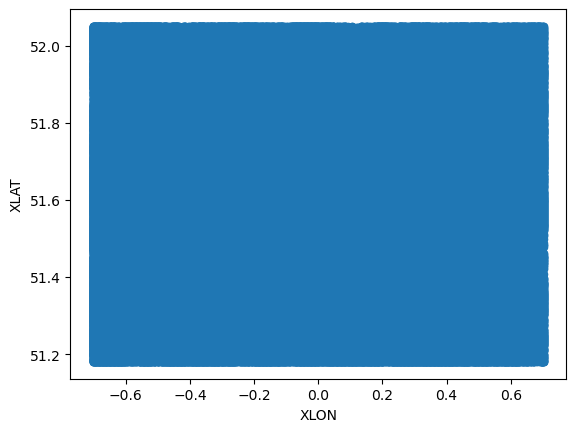

In [3]:
# old
tiles_df.plot(x="XLON", y="XLAT", kind="scatter")

In [48]:
# old
# export tiles to csv
tiles_df.to_csv("tiles.csv")

In [52]:
# define a day for the movement data

movement_df_01_01 = movement_df[(movement_df.AGG_DAY_PERIOD =="2020-01-01")]
movement_df_01_14 = movement_df[(movement_df.AGG_DAY_PERIOD =="2020-01-14")]
movement_df_07_01 = movement_df[(movement_df.AGG_DAY_PERIOD =="2020-07-01")]
movement_df_12_31 = movement_df[(movement_df.AGG_DAY_PERIOD =="2020-12-31")]

#movement_df_01_01.head()
movement_df_01_14

,AGG_DAY_PERIOD,LONLAT_ID,mean_column
2073676,2020-01-14,1,0.251743
2073677,2020-01-14,4,0.103963
2073678,2020-01-14,5,0.391786
2073679,2020-01-14,6,1.797505
2073680,2020-01-14,7,0.365115
...,...,...,...
2243096,2020-01-14,891039,0.269319
2243097,2020-01-14,891040,0.069379
2243098,2020-01-14,891041,0.061525
2243099,2020-01-14,891042,0.105546


In [53]:
# create tiles of movement data of defined day

movement_df_01_01_tiles = pd.merge(movement_df_01_01, tiles_df, on="LONLAT_ID")
movement_df_01_14_tiles = pd.merge(movement_df_01_14, tiles_df, on="LONLAT_ID")
movement_df_07_01_tiles = pd.merge(movement_df_07_01, tiles_df, on="LONLAT_ID")
movement_df_12_31_tiles = pd.merge(movement_df_12_31, tiles_df, on="LONLAT_ID")

#movement_df_01_01_tiles.head()
movement_df_01_14_tiles.head()

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT
0,2020-01-14,1,0.251743,-0.433273,51.626116
1,2020-01-14,4,0.103963,-0.081711,51.580910
2,2020-01-14,5,0.391786,-0.493698,51.927754
3,2020-01-14,6,1.797505,-0.275345,51.491217
4,2020-01-14,7,0.365115,-0.041885,51.480100


<AxesSubplot: xlabel='XLON', ylabel='XLAT'>

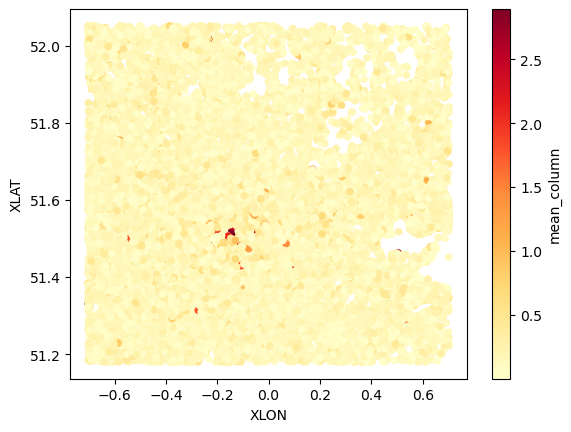

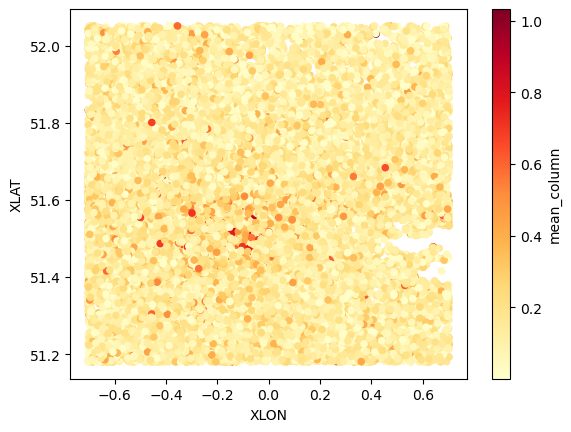

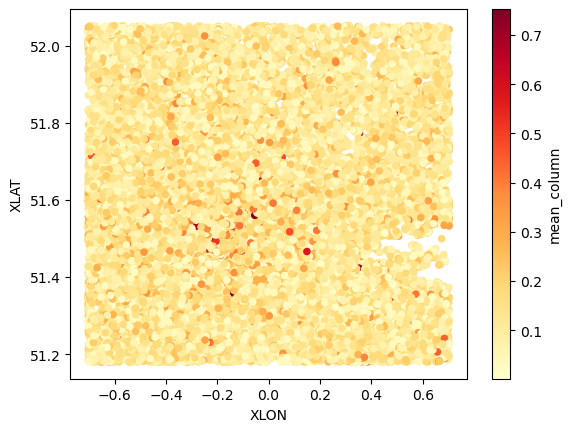

In [43]:
# plot movement data of defined day
movement_df_01_01_tiles.plot(x="XLON", y="XLAT", kind="scatter",c="mean_column",
        colormap="YlOrRd" )

movement_df_07_01_tiles.plot(x="XLON", y="XLAT", kind="scatter",c="mean_column",
        colormap="YlOrRd" )

movement_df_12_31_tiles.plot(x="XLON", y="XLAT", kind="scatter",c="mean_column",
        colormap="YlOrRd" )

In [44]:
import osmnx as ox
import geopandas as gpd
from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup, Heatmap, Choropleth
from ipywidgets import HTML
import pandas as pd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

# Specify the area of interest
westminster = "Westminster, England, UK"

# Get place boundary related to the place name as a geodataframe
westminster = ox.geocode_to_gdf(westminster)
westminster

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.21609 51.52895, -0.21609 51.52887...",51.539812,51.483806,-0.111083,-0.216091,259949226,relation,51781,51.497321,-0.137149,boundary,administrative,16,0.601388,city,City of Westminster,"City of Westminster, Greater London, England, ..."


In [54]:

movement_df = gpd.GeoDataFrame(
    movement_df_01_01_tiles, geometry=gpd.points_from_xy(movement_df_01_01_tiles.XLON, movement_df_01_01_tiles.XLAT), crs="EPSG:4326"
)
movement_df2 = gpd.GeoDataFrame(
    movement_df_07_01_tiles, geometry=gpd.points_from_xy(movement_df_07_01_tiles.XLON, movement_df_07_01_tiles.XLAT), crs="EPSG:4326"
)
movement_df3 = gpd.GeoDataFrame(
    movement_df_12_31_tiles, geometry=gpd.points_from_xy(movement_df_12_31_tiles.XLON, movement_df_12_31_tiles.XLAT), crs="EPSG:4326"
)
movement_df4 = gpd.GeoDataFrame(
    movement_df_01_14_tiles, geometry=gpd.points_from_xy(movement_df_01_14_tiles.XLON, movement_df_01_14_tiles.XLAT), crs="EPSG:4326"
)

geom = area.loc[area['place_rank'] == 12, 'geometry'].iloc[0]
movement_city_area = movement_df.intersects(geom)
movement_city_area2 = movement_df2.intersects(geom)
movement_city_area3 = movement_df3.intersects(geom)
movement_city_area4 = movement_df4.intersects(geom)
movement_city_merge = movement_df.merge(movement_city_area.to_frame(), left_index=True, right_index=True)
movement_city_merge2 = movement_df2.merge(movement_city_area2.to_frame(), left_index=True, right_index=True)
movement_city_merge3 = movement_df3.merge(movement_city_area3.to_frame(), left_index=True, right_index=True)
movement_city_merge4 = movement_df4.merge(movement_city_area4.to_frame(), left_index=True, right_index=True)
movement_city = movement_city_merge.loc[movement_city_merge[0] == True]
movement_city2 = movement_city_merge2.loc[movement_city_merge2[0] == True]
movement_city3 = movement_city_merge3.loc[movement_city_merge3[0] == True]
movement_city4 = movement_city_merge4.loc[movement_city_merge4[0] == True]
#movement_city
#movement_city2
movement_city4.head()

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,geometry,0
821,2020-01-14,1654,1.904925,-0.105057,51.516007,POINT (-0.10506 51.51601),True
888,2020-01-14,1774,1.246169,-0.107803,51.513443,POINT (-0.10780 51.51344),True
1118,2020-01-14,2255,0.916370,-0.107803,51.516007,POINT (-0.10780 51.51601),True
1639,2020-01-14,3315,0.862820,-0.092697,51.518571,POINT (-0.09270 51.51857),True
1647,2020-01-14,3328,2.034186,-0.105057,51.510879,POINT (-0.10506 51.51088),True


In [55]:
geom_west = westminster.loc[westminster['place_rank'] == 16, 'geometry'].iloc[0]
movement_west = movement_df.intersects(geom_west)
movement_west2 = movement_df2.intersects(geom_west)
movement_west3 = movement_df3.intersects(geom_west)
movement_west4 = movement_df4.intersects(geom_west)
movement_west_merge = movement_df.merge(movement_west.to_frame(), left_index=True, right_index=True)
movement_west_merge2 = movement_df2.merge(movement_west2.to_frame(), left_index=True, right_index=True)
movement_west_merge3 = movement_df3.merge(movement_west3.to_frame(), left_index=True, right_index=True)
movement_west_merge4 = movement_df4.merge(movement_west4.to_frame(), left_index=True, right_index=True)
movement_west = movement_west_merge.loc[movement_west_merge[0] == True]
movement_west2 = movement_west_merge2.loc[movement_west_merge2[0] == True]
movement_west3 = movement_west_merge3.loc[movement_west_merge3[0] == True]
movement_west4 = movement_west_merge4.loc[movement_west_merge4[0] == True]
#movement_west
#movement_west2
movement_west4.head()

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,geometry,0
106,2020-01-14,214,0.024597,-0.197067,51.516007,POINT (-0.19707 51.51601),True
118,2020-01-14,240,2.177709,-0.143509,51.507460,POINT (-0.14351 51.50746),True
124,2020-01-14,253,0.105745,-0.195694,51.524552,POINT (-0.19569 51.52455),True
157,2020-01-14,310,2.150475,-0.155869,51.512589,POINT (-0.15587 51.51259),True
190,2020-01-14,377,1.728535,-0.140762,51.516007,POINT (-0.14076 51.51601),True


In [ ]:
center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)


geo_data_area = GeoData(geo_dataframe = area,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'London City')
map.add(geo_data_area)

geo_data_west = GeoData(geo_dataframe = westminster,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Westminster')
map.add(geo_data_west)

geo_data_mov = GeoData(geo_dataframe = movement_city,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement')
map.add(geo_data_mov)
geo_data_mov2 = GeoData(geo_dataframe = movement_city2,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement')
map.add(geo_data_mov2)
geo_data_mov3 = GeoData(geo_dataframe = movement_city3,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement')
map.add(geo_data_mov3)
geo_data_mov4 = GeoData(geo_dataframe = movement_city4,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement')
map.add(geo_data_mov4)

geo_data_mov_west = GeoData(geo_dataframe = movement_west,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement West')
map.add(geo_data_mov_west)
geo_data_mov_west2 = GeoData(geo_dataframe = movement_west2,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement West')
map.add(geo_data_mov_west2)
geo_data_mov_west3 = GeoData(geo_dataframe = movement_west3,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement West')
map.add(geo_data_mov_west3)
geo_data_mov_west4 = GeoData(geo_dataframe = movement_west4,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement West')
map.add(geo_data_mov_west4)

In [ ]:
movement_city_west = pd.concat([movement_city, movement_west])
movement_city_west_df = gpd.GeoDataFrame(movement_city_west)
movement_city_west2 = pd.concat([movement_city2, movement_west2])
movement_city_west_df2 = gpd.GeoDataFrame(movement_city_west2)
movement_city_west3 = pd.concat([movement_city3, movement_west3])
movement_city_west_df3 = gpd.GeoDataFrame(movement_city_west3)
movement_city_west4 = pd.concat([movement_city4, movement_west4])
movement_city_west_df4 = gpd.GeoDataFrame(movement_city_west4)
#movement_city_west_df
movement_city_west_df2
movement_city_west_df4

In [14]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
#points = gpd.read_file('points.shp')

xmin, ymin, xmax, ymax = movement_city_west.total_bounds
print(movement_city_west.total_bounds)

length = 100
wide = 100

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")

center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)
map.add(grid)
map.add(Marker(location=(51.48437615, -0.21492004)))
map.add(Marker(location=(51.53907526, -0.07347107)))
cols

[-0.21492004 51.48437615 -0.07347107 51.53907526]


[-0.2149200439, 99.7850799561]

In [ ]:
# not important for heatmap
def create_hex_grid(gdf=None, bounds=None, n_cells=10, overlap=False, crs="EPSG:29902"):
    """Hexagonal grid over geometry.
    See https://sabrinadchan.github.io/data-blog/building-a-hexagonal-cartogram.html
    """

    from shapely.geometry import Polygon
    import geopandas as gpd
    if bounds != None:
        xmin, ymin, xmax, ymax= bounds
    else:
        xmin, ymin, xmax, ymax= gdf.total_bounds

    unit = (xmax-xmin)/n_cells
    a = np.sin(np.pi / 3)
    cols = np.arange(np.floor(xmin), np.ceil(xmax), 3 * unit)
    rows = np.arange(np.floor(ymin) / a, np.ceil(ymax) / a, unit)

    #print (len(cols))
    hexagons = []
    for x in cols:
      for i, y in enumerate(rows):
        if (i % 2 == 0):
          x0 = x
        else:
          x0 = x + 1.5 * unit

        hexagons.append(Polygon([
          (x0, y * a),
          (x0 + unit, y * a),
          (x0 + (1.5 * unit), (y + unit) * a),
          (x0 + unit, (y + (2 * unit)) * a),
          (x0, (y + (2 * unit)) * a),
          (x0 - (0.5 * unit), (y + unit) * a),
        ]))

    grid = gpd.GeoDataFrame({'geometry': hexagons},crs=crs)
    grid["grid_area"] = grid.area
    grid = grid.reset_index().rename(columns={"index": "grid_id"})
    if overlap == True:
        cols = ['grid_id','geometry','grid_area']
        grid = grid.sjoin(gdf, how='inner').drop_duplicates('geometry')
    return grid

import pylab as plt
movement_city_west = movement_city_west.to_crs("EPSG:29902")
hexgr = create_hex_grid(movement_city_west, n_cells=100, overlap=True, crs="EPSG:29902")
# hexgr.plot(fc="none", ec='black')
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)
hexgr = hexgr.to_crs("EPSG:4326")
geo_data_hex_grid = GeoData(geo_dataframe = hexgr,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Grid')
map.add(geo_data_hex_grid)
map.add(geo_data_mov)
display(map)

In [16]:
# not important for heatmap
geo_data_hex_grid_mov = geo_data_hex_grid
means_d = []
means = []
for index, row in hexgr.iterrows():
    points_in_hex = []
    for ix, r in movement_city_west_df.iterrows():
        if row.geometry.contains(r.geometry) == True:
            #print(ix)
            points_in_hex.append(movement_city_west_df.loc[ix]["mean_column"])
            #print(mean)
    mean = np.mean(points_in_hex)
    means_d.append({"index": index,
                  "mean": mean})
    means.append(mean)
    
    #print(points_in_hex) 


In [ ]:
# not important for heatmap
means_s = pd.Series(means)
i = 0
for index, row in hexgr.iterrows():
    hexgr.at[index, 'mean'] = means[i]
    i = i+1
hexgr

,grid_id,geometry,grid_area,index_right,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,0,mean
47,47,"POLYGON ((-0.21352 51.52613, -0.21208 51.52603...",26150.876667,43165,2020-01-01,110379,0.456602,-0.212173,51.527115,True,0.456602
48,48,"POLYGON ((-0.21553 51.52704, -0.21410 51.52695...",26150.876667,35409,2020-01-01,89927,0.501566,-0.214920,51.527115,True,0.220365
49,49,"POLYGON ((-0.21325 51.52767, -0.21182 51.52758...",26150.876667,92281,2020-01-01,255012,0.240778,-0.212173,51.527970,True,0.184739
50,50,"POLYGON ((-0.21527 51.52859, -0.21383 51.52849...",26150.876667,60956,2020-01-01,142822,0.069539,-0.214920,51.528824,True,0.149720
51,51,"POLYGON ((-0.21299 51.52922, -0.21155 51.52912...",26150.876667,5576,2020-01-01,14602,0.092065,-0.212173,51.529679,True,0.071125
...,...,...,...,...,...,...,...,...,...,...,...
2188,2188,"POLYGON ((-0.07861 51.51469, -0.07718 51.51459...",26150.876667,16522,2020-01-01,42381,0.014263,-0.077591,51.516007,True,0.014263
2189,2189,"POLYGON ((-0.07633 51.51532, -0.07490 51.51522...",26150.876667,100837,2020-01-01,293114,0.704758,-0.076218,51.516007,True,0.704758
2249,2249,"POLYGON ((-0.07513 51.50976, -0.07370 51.50966...",26150.876667,24931,2020-01-01,63315,2.308981,-0.074844,51.510025,True,2.360080
2251,2251,"POLYGON ((-0.07486 51.51130, -0.07343 51.51121...",26150.876667,33987,2020-01-01,86425,1.899400,-0.074844,51.511734,True,1.583780


In [19]:
# not important for heatmap
from branca.colormap import linear
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)
hexgr = hexgr.to_crs("EPSG:4326")
print(type(hexgr))
geo_dict_hex_grid = dict(zip(hexgr['grid_id'].tolist(), hexgr['geometry'].tolist()))
means_d = dict(zip(hexgr['grid_id'].tolist(), means))
print(geo_dict_hex_grid)
print(means_d)
layer = Choropleth(
    geo_data=geo_dict_hex_grid,
    choro_data=means_d,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})
map.add(layer)
map.add(geo_data_mov)
display(map)

<class 'geopandas.geodataframe.GeoDataFrame'>
{47: <POLYGON ((-0.214 51.526, -0.212 51.526, -0.211 51.527, -0.212 51.528, -0.21...>, 48: <POLYGON ((-0.216 51.527, -0.214 51.527, -0.213 51.528, -0.214 51.528, -0.21...>, 49: <POLYGON ((-0.213 51.528, -0.212 51.528, -0.211 51.528, -0.212 51.529, -0.21...>, 50: <POLYGON ((-0.215 51.529, -0.214 51.528, -0.213 51.529, -0.214 51.53, -0.215...>, 51: <POLYGON ((-0.213 51.529, -0.212 51.529, -0.211 51.53, -0.211 51.531, -0.213...>, 52: <POLYGON ((-0.215 51.53, -0.214 51.53, -0.213 51.531, -0.213 51.532, -0.215 ...>, 53: <POLYGON ((-0.213 51.531, -0.211 51.531, -0.21 51.531, -0.211 51.532, -0.212...>, 114: <POLYGON ((-0.209 51.526, -0.208 51.526, -0.207 51.526, -0.208 51.527, -0.20...>, 115: <POLYGON ((-0.211 51.527, -0.21 51.527, -0.209 51.527, -0.21 51.528, -0.211 ...>, 117: <POLYGON ((-0.211 51.528, -0.21 51.528, -0.209 51.529, -0.209 51.53, -0.211 ...>, 119: <POLYGON ((-0.211 51.53, -0.209 51.53, -0.208 51.53, -0.209 51.531, -0.21 51...>, 120

KeyError: 'features'

In [63]:
# Heatmap 01.01.2020
import json
from shapely import wkt
import shapely
import geopandas

# City
geo_data_west = GeoData(geo_dataframe = westminster,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Westminster')

movement_city_west = pd.concat([movement_city, movement_west])
movement_city_west_df = gpd.GeoDataFrame(movement_city_west)
movement_city_west_df

array_mov = []
#print(movement_city_west)
for point, row in movement_city_west.iterrows():
    array_point = json.loads(shapely.to_geojson(row.geometry))["coordinates"]
    ap = []
    ap.append(array_point[1])
    ap.append(array_point[0])
    ap.append(row.mean_column)
    array_mov.append(ap)
#print(array_mov)
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)

heatmap = Heatmap(
    locations=array_mov,
    radius=20
)

map.add(heatmap)

# Attractions

df_attractionsCity = pd.read_csv("attractionsCity.csv")
df_attractionsCity['geometry'] = df_attractionsCity['geometry'].apply(wkt.loads)
gdf_attractionsCity = gpd.GeoDataFrame(df_attractionsCity, crs='epsg:4326')


laenge=range(len(gdf_attractionsCity))
for x in laenge:
    poi = gdf_attractionsCity.iloc[x]
    marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
    pop = HTML()
    pop.value = poi[0]
    #pop.description = "Name:"
    marker2.popup = pop
    map.add(marker2)

df_attractionsWest = pd.read_csv("attractionsWest.csv")
df_attractionsWest['geometry'] = df_attractionsWest['geometry'].apply(wkt.loads)
gdf_attractionsWest = gpd.GeoDataFrame(df_attractionsWest, crs='epsg:4326')


laenge=range(len(df_attractionsWest))
for x in laenge:
    poi = df_attractionsWest.iloc[x]
    marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
    pop = HTML()
    pop.value = poi[0]
    #pop.description = "Name:"
    marker2.popup = pop
    map.add(marker2)

control = LayersControl(position='topright')
map.add(control)
display(map)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [ ]:
# Heatmap 14.01.2020
import json
from shapely import wkt
import shapely
import geopandas

# City
geo_data_west = GeoData(geo_dataframe = westminster,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Westminster')

movement_city_west4 = pd.concat([movement_city4, movement_west4])
movement_city_west_df4 = gpd.GeoDataFrame(movement_city_west4)
movement_city_west_df4

array_mov = []
#print(movement_city_west)
for point, row in movement_city_west4.iterrows():
    array_point = json.loads(shapely.to_geojson(row.geometry))["coordinates"]
    ap = []
    ap.append(array_point[1])
    ap.append(array_point[0])
    ap.append(row.mean_column)
    array_mov.append(ap)
#print(array_mov)
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)

heatmap = Heatmap(
    locations=array_mov,
    radius=20
)

map.add(heatmap)

control = LayersControl(position='topright')
map.add(control)
display(map)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [ ]:
# Heatmap 01.07.2020
import json
from shapely import wkt
import shapely
import geopandas

# City
geo_data_west = GeoData(geo_dataframe = westminster,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Westminster')

movement_city_west2 = pd.concat([movement_city2, movement_west2])
movement_city_west_df2 = gpd.GeoDataFrame(movement_city_west2)
movement_city_west_df2

array_mov = []
#print(movement_city_west)
for point, row in movement_city_west2.iterrows():
    array_point = json.loads(shapely.to_geojson(row.geometry))["coordinates"]
    ap = []
    ap.append(array_point[1])
    ap.append(array_point[0])
    ap.append(row.mean_column)
    array_mov.append(ap)
#print(array_mov)
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)

heatmap = Heatmap(
    locations=array_mov,
    radius=20
)

map.add(heatmap)

control = LayersControl(position='topright')
map.add(control)
display(map)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [62]:
# Heatmap 31.12.2020
import json
from shapely import wkt
import shapely
import geopandas

# City
geo_data_west = GeoData(geo_dataframe = westminster,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Westminster')

movement_city_west3 = pd.concat([movement_city3, movement_west3])
movement_city_west_df3 = gpd.GeoDataFrame(movement_city_west3)
movement_city_west_df3

array_mov = []
#print(movement_city_west)
for point, row in movement_city_west3.iterrows():
    array_point = json.loads(shapely.to_geojson(row.geometry))["coordinates"]
    ap = []
    ap.append(array_point[1])
    ap.append(array_point[0])
    ap.append(row.mean_column)
    array_mov.append(ap)
#print(array_mov)
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)

heatmap = Heatmap(
    locations=array_mov,
    radius=20
)

map.add(heatmap)

control = LayersControl(position='topright')
map.add(control)
display(map)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [22]:
from shapely.geometry import Point
import geopandas as gpd
pnt1 = Point(-0.433273, 51.626116)
pnt2 = Point(0.668106, 51.672981)
points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
points_df = points_df.to_crs('EPSG:5234')
points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
print(points_df.distance(points_df2))

0            NaN
1    96551.90948
dtype: float64
